### Análise Exploratória - Avaliação de Vinhos
Análise de vinhos de diversos países, preços e tipos de uva, afim de identificar:

- Qual o país com o melhor vinho
 Qual a distribuição dos preços dos vinhos
- Relação Preço x Qualidade do vinho
- Tipos de uva x Qualidade do vinho
- Melhores vinhos por faixa de preço

Para a análise, faremos o tratamento e limpeza dos dados e posterior exploração através de agrupamentos, técnicas estatísticas e gráficos.

##### Dicionário dos dados
* unnamed - Índice
* country - País de origem do vinho
* description - Descrição do vinho
* designation - Vinhedo dentro da adega de origem das uvas
* points - Número de pontos que o vinho obteve em sua avaliação
* price - Preço da garrafa de vinho
* province - Província (estado) onde o vinho foi feito
* region_1 - Região onde o vinho foi feito
* region_2 - Região mais específica
* taster_name - Nome do revisor
* taster_twitter_handle - Perfil do twitter do avaliador
* title - Nome e ano do vinho
* variety - Tipo de uva utilizada na fabricação do vinho
* winery - Adega onde o vinho foi feito

##### Classificação de pontos
* 98-100 - Classic
* 94-97 - Superb
* 90-93 - Excellent
* 87-89 - Very good
* 83-86 - Good
* 80-82 - Acceptable

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importando dados
df = pd.read_csv('winemag_data.csv')

### Visualização geral dos dados
Vamos compreender os dados através de uma visão geral: variáveis, tamanho do dataset, tipo dos dados, estatísticas, se há nulos

In [3]:
# Visualização dos dados
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
# Tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [5]:
# Informações estatísticas
df.describe().round(1)

,Unnamed: 0,points,price
count,129971.0,129971.0,120975.0
mean,64985.0,88.4,35.4
std,37519.5,3.0,41.0
min,0.0,80.0,4.0
25%,32492.5,86.0,17.0
50%,64985.0,88.0,25.0
75%,97477.5,91.0,42.0
max,129970.0,100.0,3300.0


In [6]:
# Verificando nulos
df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [7]:
# Distribuição de países
df['country'].value_counts()

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


In [8]:
# Distribuição de tipo de uvas
df['variety'].value_counts()

variety
Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Cabernet Sauvignon-Barbera        1
Sauvignonasse                     1
Forcallà                          1
Meseguera                         1
Bobal-Cabernet Sauvignon          1
Name: count, Length: 707, dtype: int64

### Limpeza e tratamento dos dados
Vamos tratar os valores nulos e deletar as variáveis que não serão interessantes para nossa análise

In [9]:
# Criando uma cópia do dataframe
df_tratado = df.copy()

In [10]:
# Removendo colunas sem utilidade para a análise
# Vamos analisar a qualidade dos vinhos de acordo com o tipo de uva, país, preço e avaliação
df_tratado = df_tratado.drop(['Unnamed: 0', 'designation', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle'], axis=1)
df_tratado.head()

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [11]:
# Informações do novo dataframe
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


In [12]:
# Cálculo de proporção dos dados ausentes em price para avaliar impacto de remoção dos vazios
# Removendo os vazios, ainda teremos 93% dos dados
print('{:.0%}'.format(df_tratado['price'].count()/df_tratado.shape[0]))

93%


In [13]:
# Excluindo valores nulos em country, price e variety
df_tratado = df_tratado.dropna(subset=['country', 'price', 'variety'])
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


### Análise Exploratória dos Dados
Vamos analisar os dados através de gráficos e agrupamentos

Text(0, 0.5, 'Frequência')

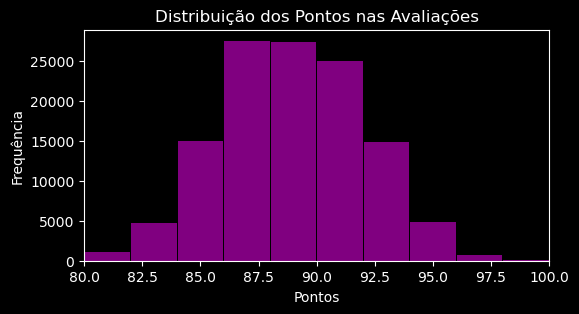

In [30]:
# Avaliando a distribuição dos pontos nas avaliações
plt.style.use('dark_background') 
plt.figure(figsize=(6, 3))
plt.hist(data = df_tratado, x = 'points', bins = 10, color = 'purple', rwidth=0.98)
plt.xlim(80, 100)
plt.title('Distribuição dos Pontos nas Avaliações', fontsize=12)
plt.xlabel('Pontos', fontsize=10)
plt.ylabel('Frequência', fontsize=10)

Text(0, 0.5, 'Total de vinhos avaliados')

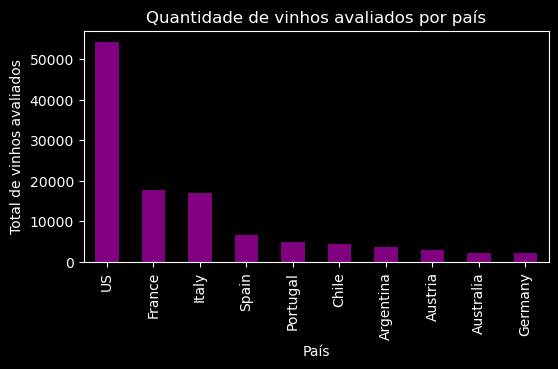

In [31]:
# Verificando os 10 países com maior produção de vinhos

# top 10 países que mais produzem vinhos
top10_prod_vinho = df_tratado['country'].value_counts()[:10]

# gráfico
plt.style.use('dark_background') 
plt.figure(figsize=(6, 3))
top10_prod_vinho.plot(kind='bar', color='purple')
plt.title('Quantidade de vinhos avaliados por país', fontsize=12)
plt.xlabel('País', fontsize=10)
plt.ylabel('Total de vinhos avaliados', fontsize=10)

In [16]:
# Países com vinhos de pontuação acima de 93 pontos
acima_93 = df_tratado[df_tratado['points'] >=93]
acima_93['country'].value_counts()

country
US              5789
France          2161
Italy           1541
Austria          487
Portugal         468
Germany          324
Spain            295
Australia        196
Argentina        134
Chile             61
New Zealand       40
South Africa      31
England           22
Canada            17
Hungary           13
Israel            12
Greece             2
India              1
Morocco            1
Name: count, dtype: int64

In [39]:
# Top 10 países com melhor média de avaliação dos vinhos
melhor_avaliacao = df_tratado.groupby('country').mean(numeric_only=True).round(2)
melhor_avaliacao = melhor_avaliacao.sort_values(by='points', ascending=False)[:10]
melhor_avaliacao

,points,price
country,,
England,91.55,51.68
India,90.22,13.33
Austria,90.19,30.76
Germany,89.84,42.26
Canada,89.38,35.71
Hungary,89.17,40.65
China,89.00,18.00
France,88.73,41.14
Luxembourg,88.67,23.33


Text(0, 0.5, 'País')

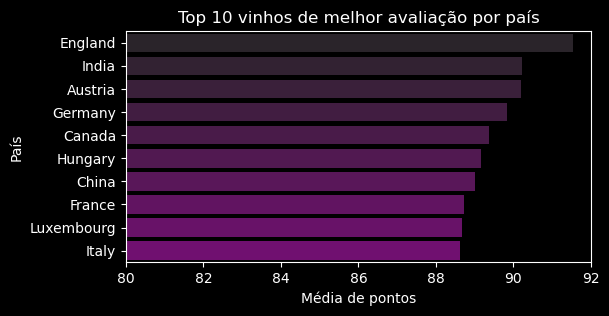

In [32]:
# Top 10 países com melhor média de avaliação dos vinhos
# A Inglaterra produz poucos vinhos, mas com boa avaliação, por isso a média de pontos ficou tão alta para este país
melhor_avaliacao = df_tratado.groupby('country').mean(numeric_only=True).round(2)
melhor_avaliacao = melhor_avaliacao.sort_values(by='points', ascending=False)[:10]

y = melhor_avaliacao.index.to_series()
x = melhor_avaliacao['points']

plt.style.use('dark_background') 
plt.figure(figsize=(6,3))
plt.xlim(80,92)
sns.barplot(x=x, y=y, hue=y, color='purple')
plt.title('Top 10 vinhos de melhor avaliação por país', fontsize = 12)
plt.xlabel('Média de pontos', fontsize=10)
plt.ylabel('País', fontsize=10)

Text(0, 0.5, 'País')

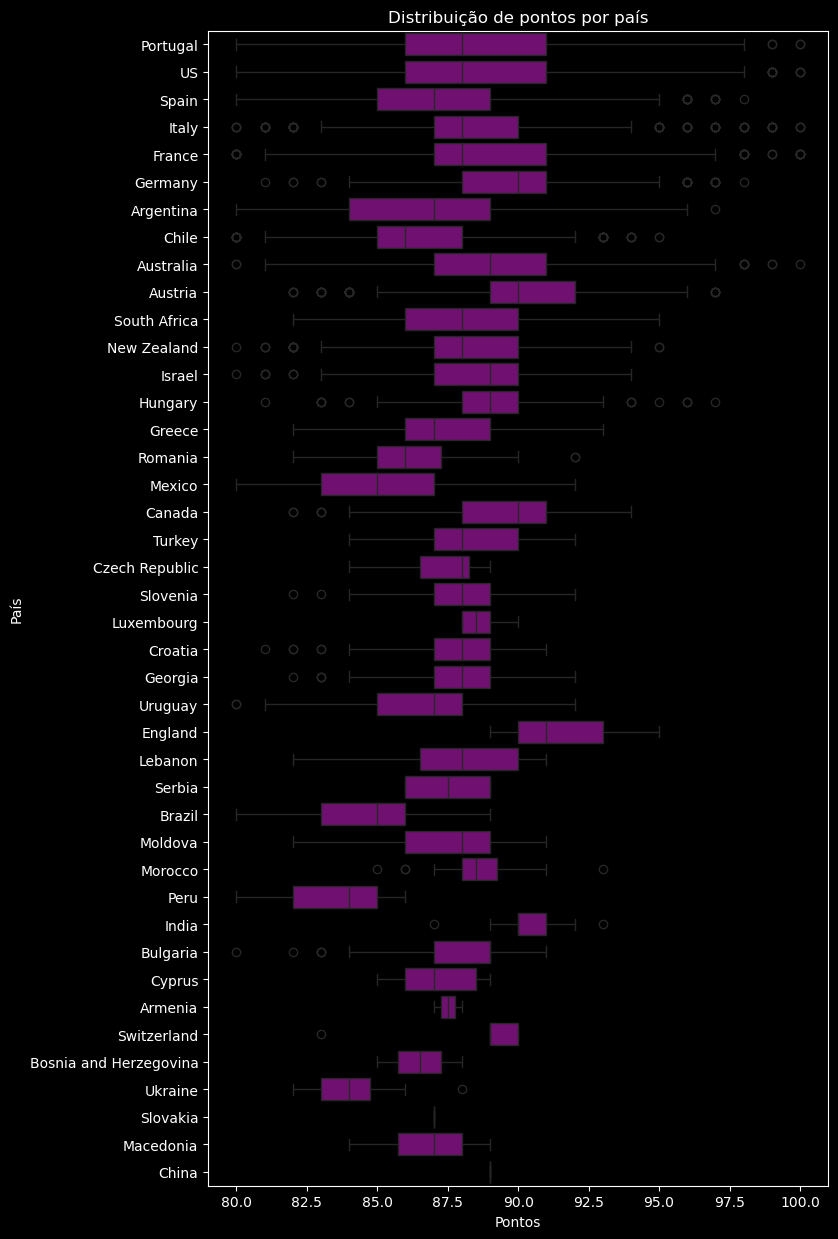

In [33]:
# Avaliando a distribuição dos pontos por país
plt.style.use('dark_background') 
plt.figure(figsize=(8,15))
sns.boxplot(data=df_tratado, x='points', y = 'country', color='purple')

plt.title('Distribuição de pontos por país', fontsize=12)
plt.xlabel('Pontos', fontsize=10)
plt.ylabel('País', fontsize=10)

Text(0, 0.5, 'País')

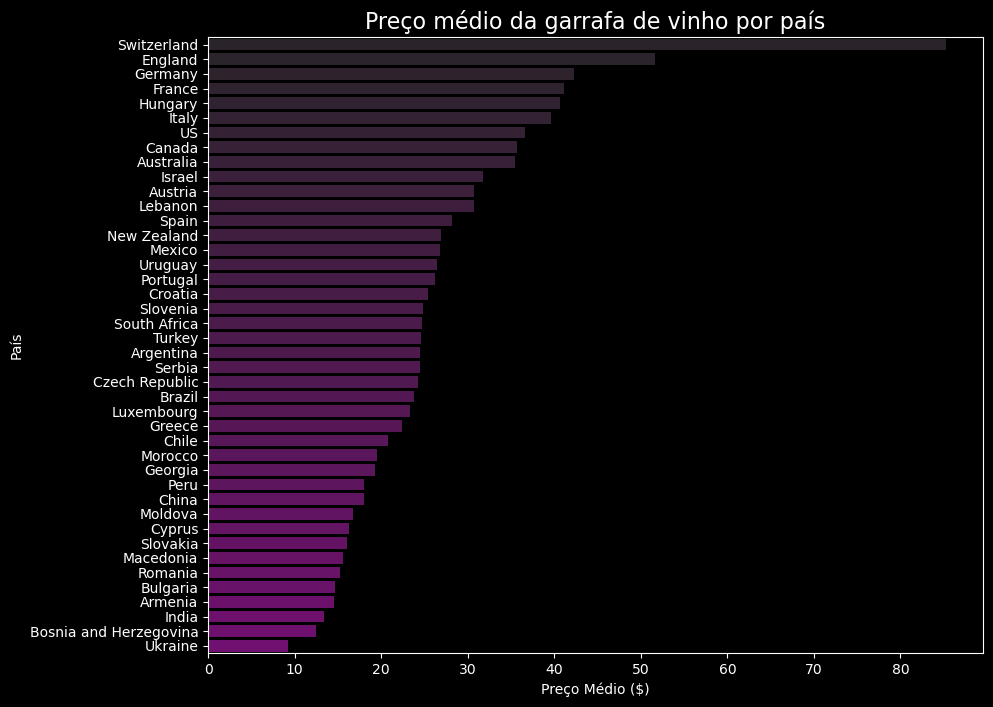

In [29]:
# Preço do vinho por país
preco_medio = df_tratado.groupby('country').mean(numeric_only=True).round(2)
preco_medio = preco_medio.sort_values(by='price', ascending=False)

y = preco_medio.index.to_series()
x = preco_medio['price']

plt.style.use('dark_background') 
plt.figure(figsize=(10,8))
sns.barplot(x=x, y=y, hue=y, color='purple')
plt.title('Preço médio da garrafa de vinho por país', fontsize=16)
plt.xlabel('Preço Médio ($)')
plt.ylabel('País')

Text(0, 0.5, 'Frequência')

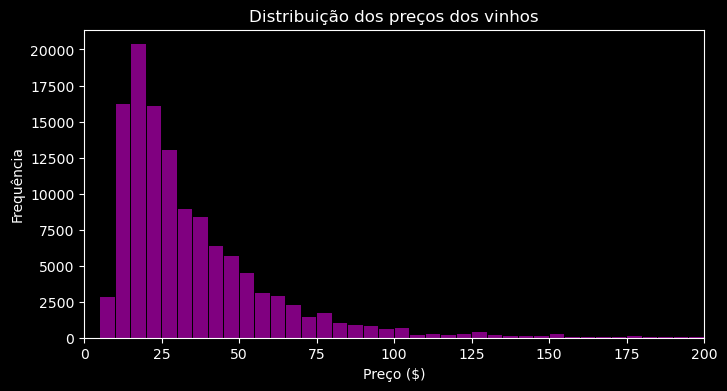

In [27]:
# Distribuição do preço dos vinhos
plt.style.use('dark_background') 
plt.figure(figsize=(8,4))
bins = np.arange(0, df_tratado['price'].max()+5, 5)

plt.hist(data = df_tratado, x='price', bins=bins, color='purple', rwidth=0.95)
plt.xlim(0,200)
plt.title('Distribuição dos preços dos vinhos', fontsize=12)
plt.xlabel('Preço ($)', fontsize=10)
plt.ylabel('Frequência', fontsize=10)

In [23]:
# Avaliando a distribuição de preços
df_tratado['price'].describe()

count    120915.000000
mean         35.368796
std          41.031188
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [24]:
# Dada a variação na distribuição de preços, vamos aplicar a escala logarítima para reduzir a assimetria desses dados
np.log10(df_tratado['price'].describe())

count    5.082480
mean     1.548620
std      1.613114
min      0.602060
25%      1.230449
50%      1.397940
75%      1.623249
max      3.518514
Name: price, dtype: float64

Text(0, 0.5, 'Frequência')

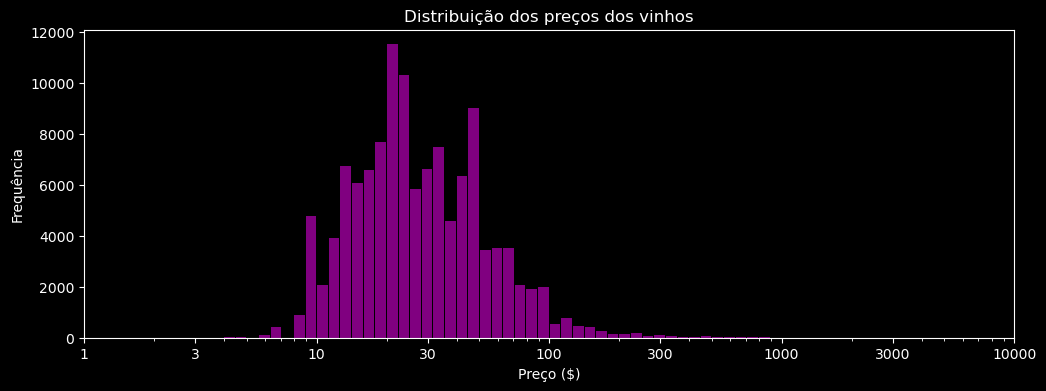

In [34]:
# Distribuição do preço dos vinhos, aplicada a escala logarítima nos preços
# Temos uma maior concentração de vinhos com valores entre 25-30 e 40-50 dólares
plt.style.use('dark_background') 
plt.figure(figsize=(12, 4))
bins = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
valores = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]

plt.hist(data=df_tratado, x='price', bins=bins, color='purple',rwidth=0.92)
plt.title('Distribuição dos preços dos vinhos', fontsize=12)
plt.xscale('log')
plt.xticks(valores, valores)
plt.xlabel('Preço ($)', fontsize=10) 
plt.ylabel('Frequência', fontsize=10)

Text(0, 0.5, 'Pontos')

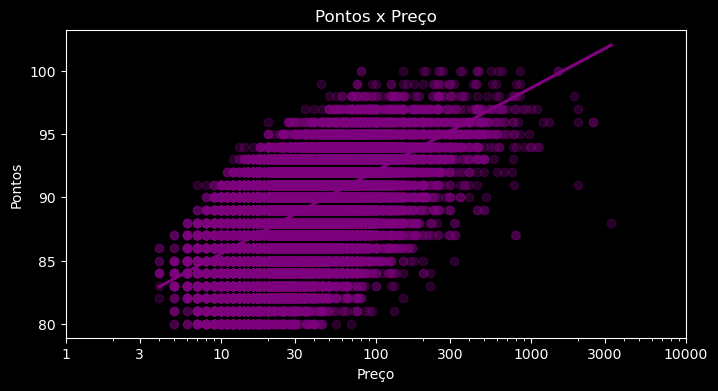

In [35]:
# Relação Preço x Qualidade (pontos nas avaliações)
x = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]

plt.style.use('dark_background') 
plt.figure(figsize=(8,4))
sns.regplot(x='price', y='points', data=df_tratado, color='purple', logx=True, scatter_kws={'alpha':0.3})
plt.title('Pontos x Preço', fontsize=12)
plt.xscale('log')
plt.xticks(x,x)
plt.xlabel('Preço', fontsize=10)
plt.ylabel('Pontos', fontsize=10)

Text(0, 0.5, 'Tipo de uva')

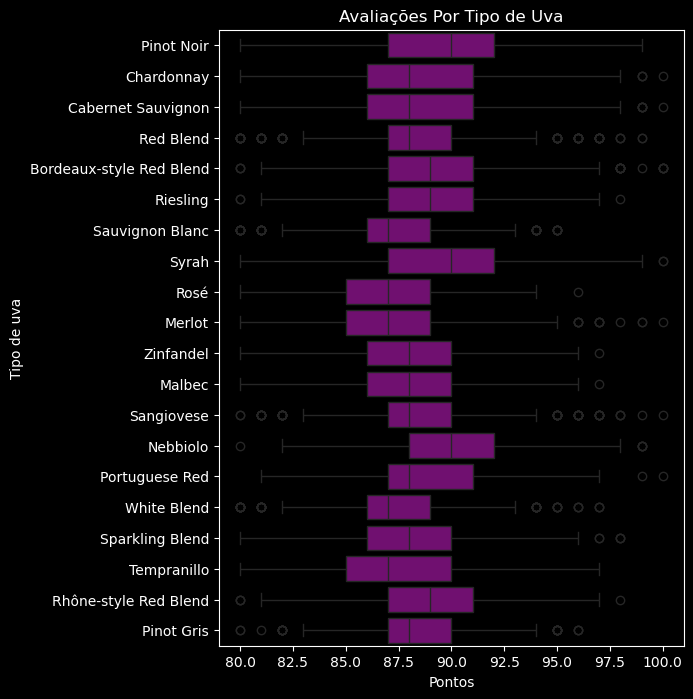

In [40]:
# Avaliando a qualidade do vinho pelo tipo de uva, considerando os 20 tipos de uvas mais utilizados
plt.style.use('dark_background') 
plt.figure(figsize=(6,8))
sns.boxplot(data=df_tratado, x='points', y='variety', color='purple', order=df_tratado['variety'].value_counts().iloc[:20].index)
plt.title('Avaliações Por Tipo de Uva', fontsize=12)
plt.xlabel('Pontos', fontsize=10)
plt.ylabel('Tipo de uva', fontsize=10)

### Avaliando os melhores vinhos por faixa de preço
Vamos gerar um novo dataframe considerando apenas o país, pontuação das avaliações, preço, nome do vinho e uva utilizada, para identificar quais os melhores vinhos de acordo com diferentes faixas de preço, sendo estas:

* Vinhos até 15 dólares
* Vinhos entre 15 e 30 dólares
* Vinhos entre 30 e 50 dólares
* Vinhos entre 50 e 100 dólares
* Vinhos acima de 100 dólares

In [26]:
# Gerando novo dataframe
# Excluímos as colunas description, province e winery
df2 = df_tratado.drop(['description', 'province', 'winery'], axis=1)

In [27]:
# Top 10 vinhos até $15
ate_15 = df2[df2['price'] <= 15]
ate_15 = ate_15.sort_values(by='points', ascending=False)[:10]
ate_15

,country,points,price,title,variety
19136,Spain,94,14.0,Osborne NV Pedro Ximenez 1827 Sweet Sherry She...,Sherry
23974,Portugal,94,13.0,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red
12255,South Africa,93,15.0,Simonsig 1998 Cabernet Sauvignon (Stellenbosch),Cabernet Sauvignon
129572,France,93,15.0,Domaine des Carteresses 2016 Tavel,Rosé
37882,Australia,93,15.0,Marquis Philips 2000 Sarah's Blend Red (South ...,Red Blend
74042,France,93,15.0,Domaine des Carteresses 2016 Tavel,Rosé
52776,US,93,14.0,Uvaggio 2009 Vermentino (Lodi),Vermentino
43193,US,93,14.0,Novy 2006 Oley Dessert Wine Viognier (Russian ...,Viognier
9609,France,93,13.0,Château Vincens 2011 Prestige Malbec-Merlot (C...,Malbec-Merlot
59823,US,93,14.0,Novy 2006 Oley Dessert Wine Viognier (Russian ...,Viognier


In [28]:
# Top 10 vinhos entre $15 e $30
ate_30 = df2[(df2['price'] > 15) & (df2['price'] <= 30)]
ate_30 = ate_30.sort_values(by='points', ascending=False)[:10]
ate_30

,country,points,price,title,variety
54311,Austria,96,28.0,Eichinger 2014 Gaisberg Reserve Riesling (Kamp...,Riesling
81902,US,96,30.0,Efeste 2009 Lola Chardonnay (Columbia Valley (...,Chardonnay
45992,France,96,28.0,Château Filhot 2014 Sauternes,Bordeaux-style White Blend
102489,US,96,27.0,The Eyrie Vineyards 2014 Estate Chardonnay (Du...,Chardonnay
119658,Spain,96,30.0,Alvear NV Solera 1927 Pedro Ximénez (Montilla-...,Pedro Ximénez
101580,US,96,20.0,Rulo 2007 Syrah (Columbia Valley (WA)),Syrah
9901,France,96,29.0,Domaines Schlumberger 2014 Saering Grand Cru R...,Riesling
40309,Italy,96,27.0,Isole e Olena 2010 Chianti Classico,Red Blend
109845,US,96,30.0,Sineann 2015 TFL Pinot Noir (Willamette Valley),Pinot Noir
54253,US,96,27.0,Donkey & Goat 2012 Grenache Noir Grenache (El ...,Grenache


In [29]:
# top 10 vinhos entre $30 e $50
ate_50 = df2[(df2['price'] > 30) & (df2['price'] <= 50)]
ate_50 = ate_50.sort_values(by='points', ascending=False)[:10]
ate_50

,country,points,price,title,variety
118059,US,99,44.0,Failla 2010 Estate Vineyard Chardonnay (Sonoma...,Chardonnay
1560,US,98,50.0,Pirouette 2008 Red Wine Red (Columbia Valley (...,Bordeaux-style Red Blend
47432,US,97,50.0,Williams Selyem 2010 Allen Vineyard Chardonnay...,Chardonnay
4504,US,97,50.0,Limerick Lane 2013 Rocky Knoll Zinfandel (Russ...,Zinfandel
114981,US,97,35.0,Donkey & Goat 2010 Fenaughty Vineyard Syrah (E...,Syrah
45986,France,97,45.0,Château Coutet 2014 Barsac,Bordeaux-style White Blend
125831,US,97,50.0,Dutton-Goldfield 2010 Dutton Ranch Rued Vineya...,Chardonnay
16524,Portugal,97,40.0,Taylor Fladgate NV 325 Anniversary (Port),Port
128268,US,97,50.0,Trefethen 2005 Estate Cabernet Sauvignon (Oak ...,Cabernet Sauvignon
89730,France,97,50.0,René Muré 2015 Clos Saint Landelin Vorbourg Gr...,Riesling


In [30]:
# Top 10 vinhos entre $50 e $100
ate_100 = df2[(df2['price'] > 50) & (df2['price'] <= 100)]
ate_100 = ate_100.sort_values(by='points', ascending=False)[:10]
ate_100

,country,points,price,title,variety
113929,US,100,80.0,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah
123545,US,100,80.0,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah
47428,US,99,75.0,Cayuse 2009 En Chamberlin Vineyard Syrah (Wall...,Syrah
47429,US,99,75.0,Williams Selyem 2010 Hirsch Vineyard Pinot Noi...,Pinot Noir
128265,US,99,100.0,Trefethen 2005 Reserve Cabernet Sauvignon (Oak...,Cabernet Sauvignon
1557,US,99,94.0,Williams Selyem 2009 Precious Mountain Vineyar...,Pinot Noir
47894,US,99,75.0,Cayuse 2011 En Chamberlin Vineyard Syrah (Wall...,Syrah
122937,Italy,98,95.0,Conti Costanti 2012 Brunello di Montalcino,Sangiovese
58353,France,98,92.0,Château Léoville Poyferré 2010 Saint-Julien,Bordeaux-style Red Blend
45784,US,98,75.0,Williams Selyem 2013 Coastlands Vineyard Pinot...,Pinot Noir


In [31]:
# Top 10 vinhos acima de $100
acima_100 = df2[df2['price'] > 100]
acima_100 = acima_100.sort_values(by='points', ascending=False)[:10]
acima_100

,country,points,price,title,variety
122935,France,100,848.0,Château Haut-Brion 2014 Pessac-Léognan,Bordeaux-style White Blend
58352,France,100,150.0,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend
111753,France,100,1500.0,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend
118058,US,100,450.0,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend
36528,France,100,259.0,Krug 2002 Brut (Champagne),Champagne Blend
39286,Italy,100,460.0,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot
45798,US,100,200.0,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon
111754,Italy,100,270.0,Casanova di Neri 2007 Cerretalto (Brunello di...,Sangiovese Grosso
89729,France,100,617.0,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay
7335,Italy,100,210.0,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile
